# kNN k近邻算法原理

## 1 原理

### 1.1 问题描述

已知训练数据集 $X\_train$ 中包含 $N$ 条样本特征（对应下图中的蓝点和黄点共10条），   
每条样本中包含 $D$ 个特征（对应下图中是 $x_{1}$ 和$x_{2}$两个特征），  
以及训练监督数据集 $y\_train$ ，包含训练集中每条样本所对应的类别。  
 $X\_train$ 是一个 $N * D$ 形状的二维矩阵， $y\_train$ 是一个长度为 $N$ 的一维向量。  
输入：一个长度为 $D$ 的一维特征向量表示的未知类别的测试样本（对应下图）。  
输出：测试样本对应的类别。

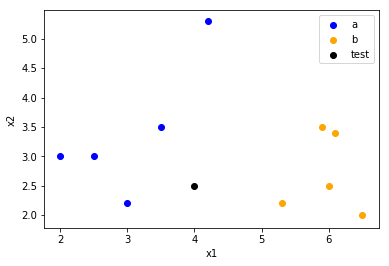

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

class_a_x1 = [2., 2.5, 3.0, 3.5, 4.2]
class_a_x2 = [3., 3., 2.2, 3.5, 5.3]
class_b_x1 = [5.3, 5.9, 6., 6.1, 6.5]
class_b_x2 = [2.2, 3.5, 2.5, 3.4, 2.]
pred_x = [4., 2.5]

plt.figure()
plt.scatter(x=class_a_x1, y=class_a_x2, c="blue", label="a")
plt.scatter(x=class_b_x1, y=class_b_x2, c="orange", label="b")
plt.scatter(*pred_x, c="black", label="test")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
# plt.grid(True)
plt.show()

### 1.2 求解

基本步骤：
* 求测试样本到所有训练样本的距离
* 对求得的距离进行排序，并从排序的训练样本中，取k个与测试样本最近的邻居点
* k个邻居点投票方式，选出票数最多的类别，做为测试样本的预测结果  

### 1.3 求距离的方式

manhattan曼哈顿距离：$\mathrm{d}_{12}=\sum_{k=1}^{n}\left|\mathrm{x}_{1 k}-x_{2 k}\right|$  
  
euclidean欧几里德距离：$d_{12}=\sqrt{\sum_{k=1}^{n}\left(x_{1 k}-x_{2 k}\right)^{2}}$  
  
chebyshev切比雪夫距离：$d_{12}=\max _{i}\left(\left|x_{1 i}-x_{2 i}\right|\right)$  
  
Minkowski闵可夫斯基距离：$d_{12}=\sqrt[p]{\sum_{k=1}^{n}\left|x_{1 k}-x_{2 k}\right|^{p}}$  
  

### 1.4 问题

#### 1.4.1 k如何选择？

取不同的k做交叉验证，选出效果最好的k

#### 1.4.2 kNN如何做回归任务？

##### 词汇表

* 数值型数据
    > 1. 在数值上可以连续表示的数据（如身高、体重），或者数值大小可以具有实际意义的（如年龄）
* 离散型数据（又称分类数据、无序数据）
    > 1. 简单来说就是类别  
    > 2. 如性别：男和女两个类别

* 分类任务
    > 预测的结果是离散型数据
* 回归任务  
    > 预测的结果是连续性数值

#### 1.4.3 离散型特征怎么求距离？

##### 离散型数据的表示方法

* 计数表示
    > 假设有10类，分别用数字0-9表示没个类别  
    > 采用计数表示，让原本没有顺序、没有大小的离散型数据带上了数值的属性  
    > 求距离不合理，不同类别的距离本该是平等的。$d_{00}=0$，$d_{09} = 9$，$d_{01}=1$   
* one-hot编码
    > 假设有10类，分别用一个长度为10的向量表示每一类，如第1类表示为[0,0,0,0,0,0,0,0,0,1]，第二类表示为[0,0,0,0,0,0,0,0,1,0]  
    > $d_{00}=0$，$d_{01} = \sqrt2$，$d_{09} = \sqrt2$  

## 2 算法复杂度

假设训练样本中有N条数据，每个数据有D个特征

### 2.1 时间复杂度

$ O(N*D) = max(O_{distance}(N*D), O_{topk}(N))$ 

### 2.2 空间复杂度

$ O(N*D) = O_{X\_train}(N*D) + O_{distance}(N) $

## 3 优缺点及其他特点

### 3.1 优点

* 实现简单  
* 精度高，多分类效果甚至好于SVM
* 对异常值不敏感
* 既可以做分类任务，又可以做回归任务

### 3.2 缺点

* 计算复杂度大且不可控，随着训练样本数增大而增大    
* 每次预测都需要重新计算测试集与每个训练集的距离，实际使用消耗太大   
* 受数值差值最大的特征的影响大，需要做特征值归一化  

### 3.3 其他特点

* 是一种监督学习  
* 没有可学习的参数  
* kNN模型的三个基本要素：距离度量、k值的选择、分类决策规则的决定。  

## 4 优化空间

### 4.1 kd树构建

### 4.2 kd树搜索

### 4.3 球树

### 4.4 复杂度

$ O(D\log_{2} N) $

## 5 适用范围  
* 训练集较小的任务  
* 对时间没有要求的离线训练任务  
* 其他较简单的分类任务和回归任务  

## 相关链接  
  
<a href="./01.2.kNN-sklearn.ipynb" style=""> 1.2 sklearn中使用kNN做分类、回归任务  </a>  
<a href="./01.3.kNN-numpy.ipynb" style=""> 1.3 numpy实现kNN分类和回归 </a>  
<a href="./01.4.kNN-tf2.ipynb"> 1.4 TensorFlow2实现kNN分类和回归 </a>  
<a href="./01.5.kNN-torch1.ipynb"> 1.5 Pytorch1实现kNN分类和回归 </a>  

## 项目源码  
https://github.com/LossJ  
进入后点击Statistic-Machine-Learning  

## 参考文献  
<a href="https://book.douban.com/subject/24703171/">[1] [M]Peter Harrington[美]. 机器学习实战. 北京: 人民邮电出版社, 2013.6.</a>  
<a href="https://book.douban.com/subject/33437381/">[2] [M]李航. 统计学习方法(第二版). 北京：清华大学出版社，2019.5.1.</a>